# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import csv
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&"
# i = city # (max 50), s = set #
i = 1
s = 1

# initialize empty column lists
name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

city_data = zip(name, cloudiness, country, date, humidity, lat, lng, max_temp, wind_speed)

print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    # perform API calls
    query_url = f"{url}appid={weather_api_key}&q={city}"
    weather_response = requests.get(query_url)    
    try:
        weather_json = weather_response.json()
        cloudiness.append(weather_json["clouds"]["all"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        humidity.append(weather_json["main"]["humidity"])
        lat.append(weather_json["coord"]["lat"])
        lng.append(weather_json["coord"]["lon"])
        max_temp.append(weather_json["main"]["temp_max"])
        wind_speed.append(weather_json["wind"]["speed"])
        print(f"Processing Record {i} of Set {s} | {city}")        
        name.append(city)
        i = i + 1
        # each set contains 50 cities. start new set @ 51
        if i == 51:
            i = 1
            s = s + 1
    except KeyError:
        print("City not found. Skipping...")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | thinadhoo
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | rawlins
City not found. Skipping...
Processing Record 4 of Set 1 | lagoa
Processing Record 5 of Set 1 | gudari
Processing Record 6 of Set 1 | lebowakgomo
Processing Record 7 of Set 1 | sola
City not found. Skipping...
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | bilibino
Processing Record 10 of Set 1 | provideniya
Processing Record 11 of Set 1 | christchurch
Processing Record 12 of Set 1 | magsaysay
Processing Record 13 of Set 1 | isangel
Processing Record 14 of Set 1 | upernavik
Processing Record 15 of Set 1 | haysville
Processing Record 16 of Set 1 | rikitea
City not found. Skipping...
Processing Record 17 of Set 1 | shediac
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | forest lake
Processing Record 20 of Set 1 | abalak
Processing Record 21 of Set 1 | muscat
Proce

City not found. Skipping...
Processing Record 39 of Set 4 | noumea
Processing Record 40 of Set 4 | ostrovnoy
Processing Record 41 of Set 4 | carnarvon
Processing Record 42 of Set 4 | maningrida
City not found. Skipping...
Processing Record 43 of Set 4 | aras
Processing Record 44 of Set 4 | tateyama
Processing Record 45 of Set 4 | sangar
Processing Record 46 of Set 4 | klaksvik
Processing Record 47 of Set 4 | iztapa
City not found. Skipping...
Processing Record 48 of Set 4 | iqaluit
Processing Record 49 of Set 4 | hegang
Processing Record 50 of Set 4 | scottsbluff
Processing Record 1 of Set 5 | beira
Processing Record 2 of Set 5 | liku
Processing Record 3 of Set 5 | luderitz
Processing Record 4 of Set 5 | paamiut
Processing Record 5 of Set 5 | ishigaki
Processing Record 6 of Set 5 | hithadhoo
Processing Record 7 of Set 5 | naze
City not found. Skipping...
Processing Record 8 of Set 5 | damara
Processing Record 9 of Set 5 | lincoln
Processing Record 10 of Set 5 | zyryanka
Processing Reco

City not found. Skipping...
Processing Record 27 of Set 8 | diego de almagro
Processing Record 28 of Set 8 | rawson
Processing Record 29 of Set 8 | xuddur
Processing Record 30 of Set 8 | odesskoye
Processing Record 31 of Set 8 | karratha
Processing Record 32 of Set 8 | snasa
Processing Record 33 of Set 8 | agadez
Processing Record 34 of Set 8 | candido mendes
Processing Record 35 of Set 8 | tuensang
Processing Record 36 of Set 8 | lima
Processing Record 37 of Set 8 | soyo
Processing Record 38 of Set 8 | abaza
Processing Record 39 of Set 8 | oranjestad
City not found. Skipping...
Processing Record 40 of Set 8 | touros
City not found. Skipping...
Processing Record 41 of Set 8 | inirida
Processing Record 42 of Set 8 | opunake
Processing Record 43 of Set 8 | bjelovar
Processing Record 44 of Set 8 | tiksi
Processing Record 45 of Set 8 | marysville
Processing Record 46 of Set 8 | vaitape
Processing Record 47 of Set 8 | dubai
Processing Record 48 of Set 8 | haverfordwest
Processing Record 49 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#remove this row the next time you run the cell above
city_data = zip(name, cloudiness, country, date, humidity, lat, lng, max_temp, wind_speed)

# write to csv
with open(output_data_file, "w", newline = "") as f:
    writer = csv.writer(f)
    writer.writerow(["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"])
    writer.writerows(city_data)

In [5]:
weather = pd.read_csv(output_data_file)
weather.count()

City          551
Cloudiness    551
Country       549
Date          551
Humidity      551
Lat           551
Lng           551
Max Temp      551
Wind Speed    551
dtype: int64

In [6]:
weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,thinadhoo,100,MV,1578358668,75,0.53,72.93,83.66,16.22
1,georgetown,40,GY,1578358109,83,6.80,-58.16,78.80,4.70
2,rawlins,40,US,1578358671,62,41.79,-107.24,25.00,12.75
3,lagoa,0,PT,1578358233,87,37.14,-8.45,52.00,4.70
4,gudari,0,IN,1578358674,87,19.34,83.79,55.18,2.37


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [7]:
from datetime import date

# establish date variable
today = date.today()
current_date = today.strftime("%m/%d/%y")

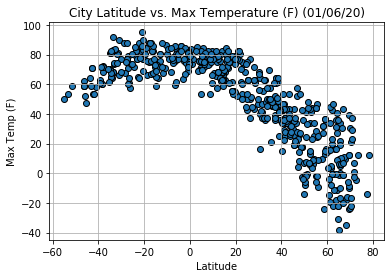

In [8]:
plt.scatter(weather["Lat"], weather["Max Temp"], marker="o", edgecolors="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title(f"City Latitude vs. Max Temperature (F) ({current_date})")
plt.savefig("Images/lat_vs_temp.png")
plt.show()

In [ ]:
# This code plots the current day's maximum temperature for approx. 500 cities as compared to their 
# latitudes. This plot reveals a correlation between the two criteria, and suggests that the closer 
# you move toward the equator (latitude 0), the higher the maximum temperature will be, and vice versa.

#### Latitude vs. Humidity Plot

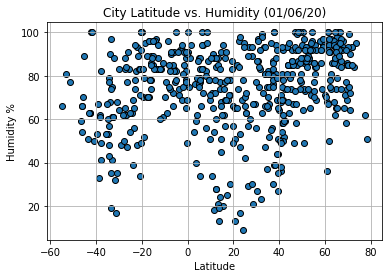

In [9]:
plt.scatter(weather["Lat"], weather["Humidity"], marker="o", edgecolors="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title(f"City Latitude vs. Humidity ({current_date})")
plt.savefig("Images/lat_vs_humidity.png")
plt.show()

In [ ]:
# This code plots the current day's humidity for approx. 500 cities as compared to their latitudes. 
# This plot reveals a slight correlation between latitude and humidity, with cities located at higher 
# latitudes (above 40 degrees) experiencing an increased instance of high humidity (above 80%). It 
# also reveals that overall, most cities have a humidity of 60-100 regardless of latitude.

#### Latitude vs. Cloudiness Plot

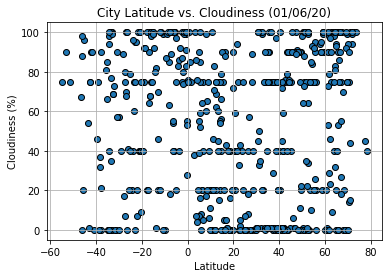

In [10]:
plt.scatter(weather["Lat"], weather["Cloudiness"], marker="o", edgecolors="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({current_date})")
plt.savefig("Images/lat_vs_cloudiness.png")
plt.show()

In [ ]:
# This code plots the current day's cloudiness for approx. 500 cities as compared to their latitudes. This 
# plot does not reveal much of a correlation between latitude and cloudiness.

#### Latitude vs. Wind Speed Plot

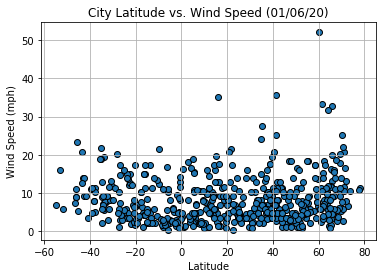

In [11]:
plt.scatter(weather["Lat"], weather["Wind Speed"], marker="o", edgecolors="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed ({current_date})")
plt.savefig("Images/lat_vs_wind.png")
plt.show()

In [ ]:
# This code plots the current day's wind speed for approx. 500 cities as compared to their latitudes. This 
# plot suggests that while most cities have a wind speed of less than 20mph (with the majority of cities 
# experiencing winds less than 10mph), there is a slight correlation between extreme latitudes and faster 
# wind speeds. Cities below -30 degrees or above 50 degrees latitude appear to have a higher instance of 
# wind speeds greater than 20mph.

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [12]:
# Create Northern and Southern Hemisphere DataFrames
northern_lat_and_temp_df = weather.loc[weather["Lat"] >= 0]
southern_lat_and_temp_df = weather.loc[weather["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8604588310323499


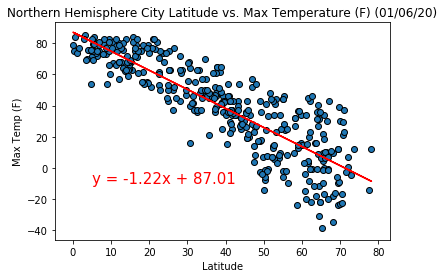

In [13]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat_and_temp_df["Lat"], northern_lat_and_temp_df["Max Temp"])
regress_values = slope * northern_lat_and_temp_df["Lat"] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_lat_and_temp_df["Lat"], regress_values, "r-")
plt.annotate(line_eq,(5,-10), fontsize=15, color="r")
print(f"The r-squared is: {rvalue}")

plt.scatter(northern_lat_and_temp_df["Lat"], northern_lat_and_temp_df["Max Temp"], marker="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title(f"Northern Hemisphere City Latitude vs. Max Temperature (F) ({current_date})")
plt.savefig("Images/north_lat_vs_temp_linregress.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.47335140377476786


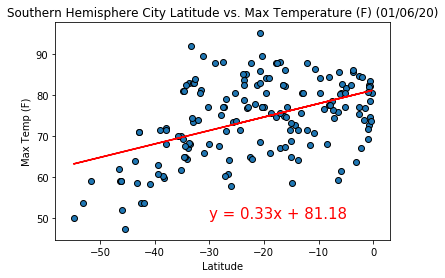

In [14]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat_and_temp_df["Lat"], southern_lat_and_temp_df["Max Temp"])
regress_values = slope * southern_lat_and_temp_df["Lat"] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_lat_and_temp_df["Lat"], regress_values, "r-")
plt.annotate(line_eq,(-30,50), fontsize=15, color="r")
print(f"The r-squared is: {rvalue}")

plt.scatter(southern_lat_and_temp_df["Lat"], southern_lat_and_temp_df["Max Temp"], marker="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title(f"Southern Hemisphere City Latitude vs. Max Temperature (F) ({current_date})")
plt.savefig("Images/south_lat_vs_temp_linregress.png")
plt.show()

In [ ]:
# This linear regression is modeling and projecting the relationship between city latitude and maximum 
# temperature. The slope of the line in the N. hemisphere is negative, suggesting the maximum 
# temperature decreases as you move away from the equator toward the north pole. The slope of the line 
# in the S. hemisphere is positive, suggesting the maxmimum temperature increases as you move away from
# the south pole, toward the equator. These regression lines suggest that the closer you get to the 
# equator (latitude 0), the higher the maximum temperature will be and vice versa.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.30473136214462204


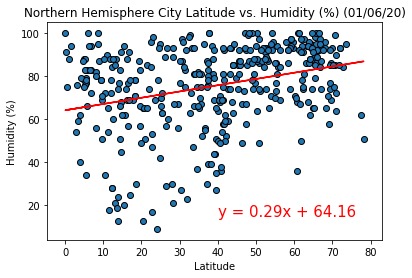

In [15]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat_and_temp_df["Lat"], northern_lat_and_temp_df["Humidity"])
regress_values = slope * northern_lat_and_temp_df["Lat"] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_lat_and_temp_df["Lat"], regress_values, "r-")
plt.annotate(line_eq,(40,15), fontsize=15, color="r")
print(f"The r-squared is: {rvalue}")

plt.scatter(northern_lat_and_temp_df["Lat"], northern_lat_and_temp_df["Humidity"], marker="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Northern Hemisphere City Latitude vs. Humidity (%) ({current_date})")
plt.savefig("Images/north_lat_vs_humidity_linregress.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.41146543630529714


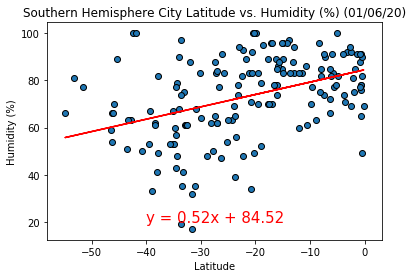

In [16]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat_and_temp_df["Lat"], southern_lat_and_temp_df["Humidity"])
regress_values = slope * southern_lat_and_temp_df["Lat"] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_lat_and_temp_df["Lat"], regress_values, "r-")
plt.annotate(line_eq,(-40,20), fontsize=15, color="r")
print(f"The r-squared is: {rvalue}")

plt.scatter(southern_lat_and_temp_df["Lat"], southern_lat_and_temp_df["Humidity"], marker="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Southern Hemisphere City Latitude vs. Humidity (%) ({current_date})")
plt.savefig("Images/south_lat_vs_humidity_linregress.png")
plt.show()

In [ ]:
# This linear regression is modeling and projecting the relationship between city latitude and humidity. 
# The slopes of both regression lines are positive, which suggests that humidity increases as you move 
# away from the south pole and continues to increaase past the equator toward the north pole.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.22022541863690462


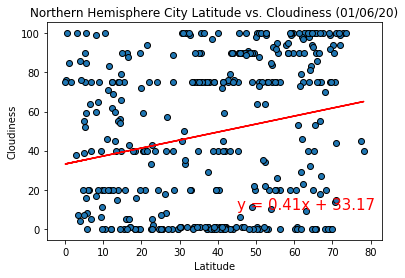

In [17]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat_and_temp_df["Lat"], northern_lat_and_temp_df["Cloudiness"])
regress_values = slope * northern_lat_and_temp_df["Lat"] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_lat_and_temp_df["Lat"], regress_values, "r-")
plt.annotate(line_eq,(45,10), fontsize=15, color="r")
print(f"The r-squared is: {rvalue}")

plt.scatter(northern_lat_and_temp_df["Lat"], northern_lat_and_temp_df["Cloudiness"], marker="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Northern Hemisphere City Latitude vs. Cloudiness ({current_date})")
plt.savefig("Images/north_lat_vs_cloudiness_linregress.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.23849736903796548


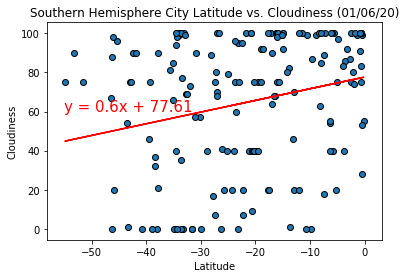

In [18]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat_and_temp_df["Lat"], southern_lat_and_temp_df["Cloudiness"])
regress_values = slope * southern_lat_and_temp_df["Lat"] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_lat_and_temp_df["Lat"], regress_values, "r-")
plt.annotate(line_eq,(-55,60), fontsize=15, color="r")
print(f"The r-squared is: {rvalue}")

plt.scatter(southern_lat_and_temp_df["Lat"], southern_lat_and_temp_df["Cloudiness"], marker="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Southern Hemisphere City Latitude vs. Cloudiness ({current_date})")
plt.savefig("Images/south_lat_vs_cloudiness_linregress.png")
plt.show()

In [ ]:
# This linear regression is modeling and projecting the relationship between city latitude and cloudiness. 
# The slopes of both regression lines are positive, which suggests that cloudiness increases as you move 
# away from the south pole and continuesto increaase as you move past the equator toward the north pole 
# in a pattern similar to that of humidity. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.15748703206078143


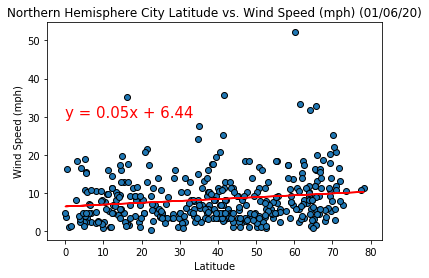

In [19]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat_and_temp_df["Lat"], northern_lat_and_temp_df["Wind Speed"])
regress_values = slope * northern_lat_and_temp_df["Lat"] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_lat_and_temp_df["Lat"], regress_values, "r-")
plt.annotate(line_eq,(0,30), fontsize=15, color="r")
print(f"The r-squared is: {rvalue}")

plt.scatter(northern_lat_and_temp_df["Lat"], northern_lat_and_temp_df["Wind Speed"], marker="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Northern Hemisphere City Latitude vs. Wind Speed (mph) ({current_date})")
plt.savefig("Images/north_lat_vs_wind_linregress.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.34136709734347886


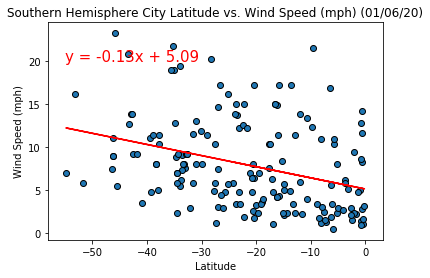

In [20]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat_and_temp_df["Lat"], southern_lat_and_temp_df["Wind Speed"])
regress_values = slope * southern_lat_and_temp_df["Lat"] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_lat_and_temp_df["Lat"], regress_values, "r-")
plt.annotate(line_eq,(-55,20), fontsize=15, color="r")
print(f"The r-squared is: {rvalue}")

plt.scatter(southern_lat_and_temp_df["Lat"], southern_lat_and_temp_df["Wind Speed"], marker="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Southern Hemisphere City Latitude vs. Wind Speed (mph) ({current_date})")
plt.savefig("Images/south_lat_vs_wind_linregress.png")
plt.show()

In [ ]:
# This linear regression is modeling and projecting the relationship between city latitude and wind speed. 
# The slopes of these lines are gradual, not particularly steep, and have opposite signs in the different 
# hemispheres, suggesting that wind speed generally decreases as you move toward the equator, and increase
# only gradually as you move toward the poles. 

In [ ]:
# 3 OBSERVABLE TRENDS:

# 1. There is a definite correlation between latitude and maximum temperature. The data pulled from 
#    approx. 500 random cities clearly demonstrates that as you approach the equator, temperature 
#    generally increases.
# 2. According to the linear regression plots, both humidity and cloudiness increase as you move from the
#    south pole toward the north pole. This makes logical sense, as clouds are basically made up of 
#    humidity--water vapor suspended in air.
# 3. Wind speeds generally stay below 10 or 20 mph regardless of latitude, as evidenced by the wind speed
#    scatter plot as well as the small slopes of the regression lines for both hemispheres. This pattern 
#    is broken as we move toward more extreme latitudes, where winds pick up as you approach the poles.